### Imputation for panel data

In [1]:
import pandas as pd

# Create a sample DataFrame representing panel data
data = {
    'Patient': ['A', 'A', 'A', 'B', 'B', 'B'],
    'Visit': [1, 2, 3, 1, 2, 3],
    'Value': [1, 2, None, 4, None, 6]
}
df = pd.DataFrame(data)

# Set the index to be a MultiIndex using 'Entity' and 'Time'
df.set_index(['Patient', 'Visit'], inplace=True)

# Forward-fill missing values within each entity
df_filled = df.ffill()

print("Original DataFrame:")
print(df)

print("\nDataFrame after forward-fill:")
print(df_filled)

Original DataFrame:
               Value
Patient Visit       
A       1        1.0
        2        2.0
        3        NaN
B       1        4.0
        2        NaN
        3        6.0

DataFrame after forward-fill:
               Value
Patient Visit       
A       1        1.0
        2        2.0
        3        2.0
B       1        4.0
        2        4.0
        3        6.0


In [ ]:
df.reset_index()

,Patient,Visit,Value
0,A,1,1.0
1,A,2,2.0
2,A,3,NaN
3,B,1,4.0
4,B,2,NaN
5,B,3,6.0


In [ ]:
df.sort_values(by=['Patient', 'Visit']).groupby('Patient')['Value'].bfill().reset_index()

,Patient,Visit,Value
0,A,1,1.0
1,A,2,2.0
2,A,3,NaN
3,B,1,4.0
4,B,2,6.0
5,B,3,6.0


## Excercise: Diabetes dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Path')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'nnn'
os.environ['KAGGLE_KEY'] = 'kkk'


!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip /content/drive/MyDrive/Colab_Notebooks/BDA/pima-indians-diabetes-database.zip



pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/drive/MyDrive/Colab_Notebooks/BDA/pima-indians-diabetes-database.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/PATH/diabetes.csv')

#Let's create fake training/test sets
test_indices=df.dropna().sample(frac=0.15, random_state=42).index
train_indices=set(df.index)-set(test_indices)

df_test=df.loc[list(test_indices),:]
df=df.loc[list(train_indices),:]

#The dataset contains some features and a target variable of interest
features = ['Pregnancies',
            'Glucose',
            'BloodPressure',
            'SkinThickness',
            'Insulin',
            'BMI',
            'DiabetesPedigreeFunction',
            'Age']
target='Outcome'

df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<Axes: >

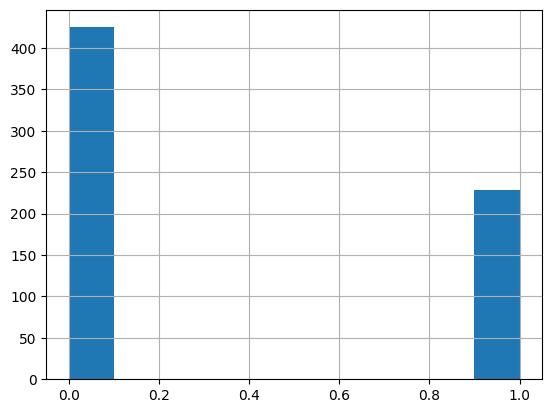

In [ ]:
df['Outcome'].hist()

In [ ]:
#Apparently there are no NaNs
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#But an inspection of the dataset reveals that some variables have suspicious zero values.
#Those are NaNs (it is clearly stated if you look at the dataset documentation)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,3.823890,120.840735,69.185299,20.287902,80.261868,31.937519,0.471908,32.856049,0.349158
std,3.372741,32.051661,18.830963,15.588254,116.176868,7.786721,0.338030,11.477537,0.477069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.000000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,22.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,127.000000,36.400000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#Let's replace zeros with standard np.nan values and check how many are they

mask_missing=(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] == 0)
num_missing = (mask_missing).sum()
# report the results
print(num_missing)

Glucose            5
BloodPressure     27
SkinThickness    192
Insulin          315
BMI                8
dtype: int64


In [ ]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']]= df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0, np.nan)

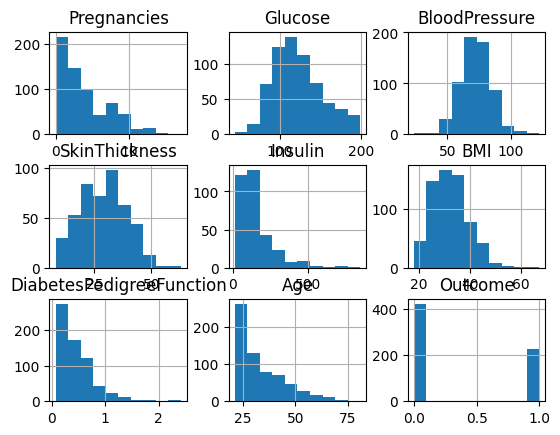

In [ ]:
#What are the distribution of the variables in the dataset?

import matplotlib.pyplot as plt
df.hist()
plt.show()

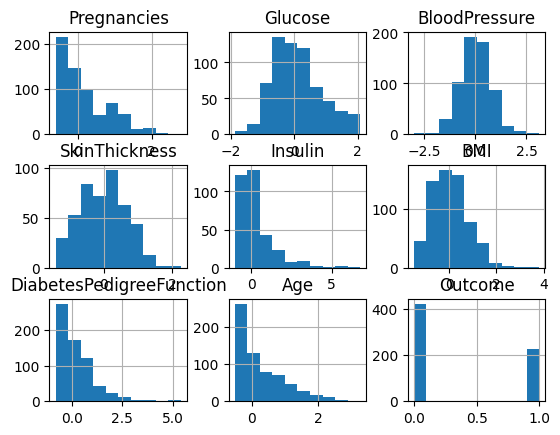

In [ ]:

#As we saw, many imputation methods require features to be rescaled (knn, IterativeImputer).
#As we are going to use them, let us rescale the original features using the robust rescaler from sklearn (it subtracts the median and rescale using IQR).
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_train=df.copy()
df_train[features] = scaler.fit_transform(df_train[features])

#If we plot the distributions again, we see that they are not distorted. Just rescaled.
df_train.hist()
plt.show()

In [ ]:
df_train.shape

(653, 9)

#Excercise

## Drop rows containing nan values
* Create a dataset copy where you drop all rows containing NaN values in the feature columns
* Compare variable distribution before and after dropping cols. Is there any clear difference? Use histograms and consider adding the inputs alpha=0.5 and density=True for an easier comparison.

## Simple imputation of missing values
* Choose what may be the best technique for simple imputation considering the column meaning and distribution
* Create a copy of the dataset where you use simple imputation techniques to fill missing data
* Compare variable distribution before and after imputing cols. Is there any clear difference?

## Iterative Imputation

* Create a copy of the df and use IterativeImputer to impute missing data
* Compare variable distribution before and after imputing cols. Is there any clear difference?

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## kNN imputer

* Create a copy of the df and use kNN imputation on  missing data.
* How many k? Usually not more than 5. 

### Compare missing value deletion and imputation methods.

* As the outcome we want to predict is binary, the simplest method we can use is logistic regression (from sklearn).

* Given the results obtained what is the best imputation method?
* Can you think about some other methods to estimate what was the best approach used? Think about correlation/distribution distance.


### Finally, assuming there is no MNAR happening here, can you guess whether data are MCAR or MAR?

In [ ]:

# fit a model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# collect all the training sets created above
training_df_dict={
    'drop': drop_df, ##CHANGE NAME
    'SimpleImputer': simple_df, ##CHANGE NAME
    'IterativeImputer': df_iterative, ##CHANGE NAME
    'kNNImputer':df_kNN ##CHANGE NAME
}

# Scale test set features with the same scaler used for training
scaled_test_df=df_test.copy()
scaled_test_df[features] = scaler.transform(scaled_test_df[features])

# fit a logistic regression model on each training set obtained with different imputation techniques
for method in training_df_dict.keys():
  training_df=training_df_dict[method]
  X_train = training_df[features]
  model = LogisticRegression(solver='lbfgs')

  model.fit(X_train, training_df[target])
  # predict binary outcomes on the rescaled test set
  y_pred = model.predict(scaled_test_df[features])
  print(classification_report(df_test[target], y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81        75
           1       0.64      0.62      0.63        40

    accuracy                           0.75       115
   macro avg       0.72      0.72      0.72       115
weighted avg       0.75      0.75      0.75       115

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        75
           1       0.63      0.68      0.65        40

    accuracy                           0.75       115
   macro avg       0.72      0.73      0.73       115
weighted avg       0.75      0.75      0.75       115

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        75
           1       0.60      0.68      0.64        40

    accuracy                           0.73       115
   macro avg       0.71      0.72      0.71       115
weighted avg       0.74      0.73      0.73       115

              preci